In [18]:
import numpy as np
import pandas as pd

gender_df = pd.read_csv("/Users/deepanjalikumar/Library/CloudStorage/OneDrive-Personal/Kaggle exercises/titanic/gender_submission.csv")
print(gender_df)

     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [19]:
# load the train and test dataset

train_df = pd.read_csv("/Users/deepanjalikumar/Library/CloudStorage/OneDrive-Personal/Kaggle exercises/titanic/train.csv")
test_df = pd.read_csv("/Users/deepanjalikumar/Library/CloudStorage/OneDrive-Personal/Kaggle exercises/titanic/test.csv")

In [20]:
print("Training Data Info:")
print(train_df.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [21]:
# Summary of all missing values column by column

train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

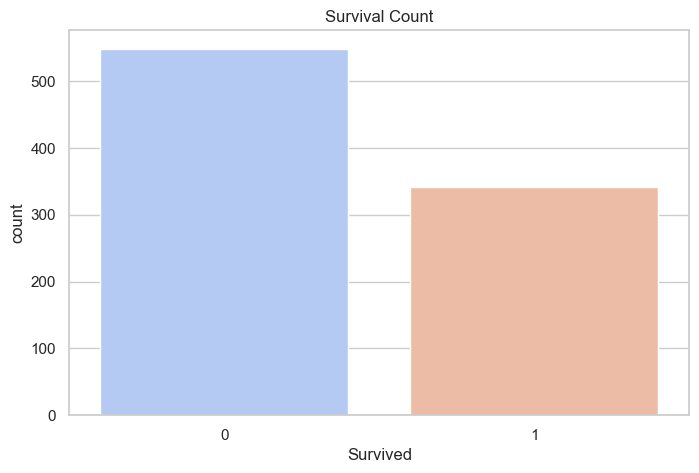

In [22]:
# Bar chart to get a visual representation of Survival count using the Survived Variable 

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='Survived', data=train_df, palette='coolwarm')
plt.title('Survival Count')
plt.show()

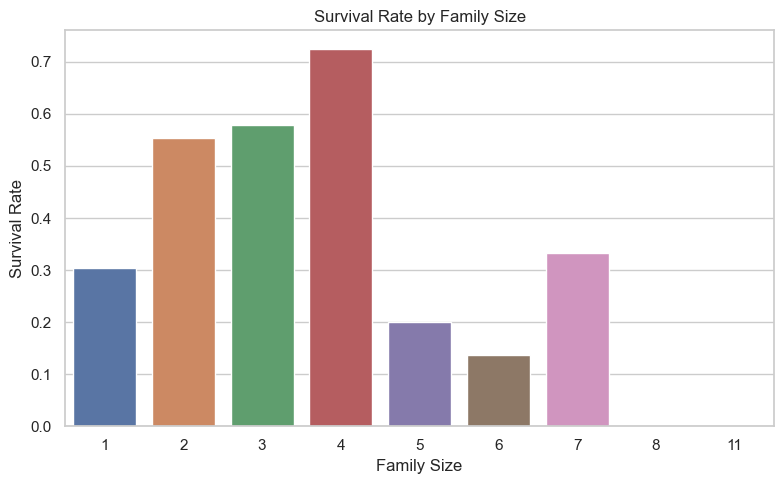

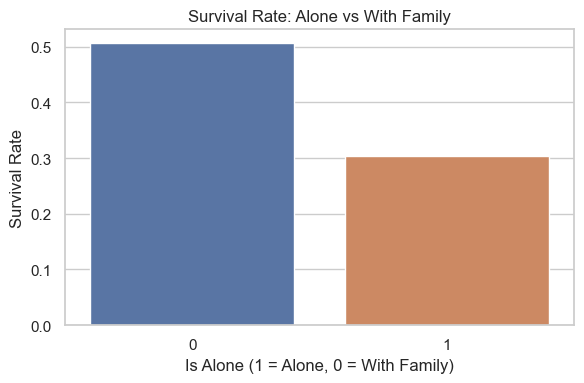

In [23]:
# Feature engineering
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)

# Set seaborn style
sns.set(style="whitegrid")

# Plot 1: Survival Rate by Family Size
plt.figure(figsize=(8, 5))
sns.barplot(x='FamilySize', y='Survived', data=train_df, ci=None)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.xlabel('Family Size')
plt.tight_layout()
plt.show()

# Plot 2: Survival Rate by IsAlone
plt.figure(figsize=(6, 4))
sns.barplot(x='IsAlone', y='Survived', data=train_df, ci=None)
plt.title('Survival Rate: Alone vs With Family')
plt.ylabel('Survival Rate')
plt.xlabel('Is Alone (1 = Alone, 0 = With Family)')
plt.tight_layout()
plt.show()

## What is each line of code doing?

train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 ; Number of siblings/spouses aboard the Titanic + Number of parents/children aboard + passenger themselves
* Why +1? Because the passenger is part of their own group.

train_df['IsAlone'] = train_df['FamilySize'] == 1 ; checks whether the passenger is travelling alone
* FamilySize == 1 means no siblings/spouse/parents/children only the passenger
* Returns True or False then .astype (int) converts that to 1 (True) or 0 (False)

## Why include the passenger themselves in FamilySize (+1)?
* The variables SibSp and Parch tell you how many relatives are with the passenger
* But the passenger themselves is also part of their own family group (you cant be alone if you are part of a family group with others and yourself)
* So by adding +1 we are saying: "How many people in total are in this travel group including the passenger themselves"



## Survival Rate by Family Size

* Passengers with a small family size (2-4) had the highest survival rates
* Passengers with a large family size (5-7) had the lowest survival rates
* Those alone family size = 1 had lower chances

## Survival Rate: IsAlone

* Passengers who were alone (IsAlone = 1) had significantly lower survival rates
* Those with at least one family member (IsAlone = 0) had higher survival rates; maybe due to support, protection or being prioritised. 

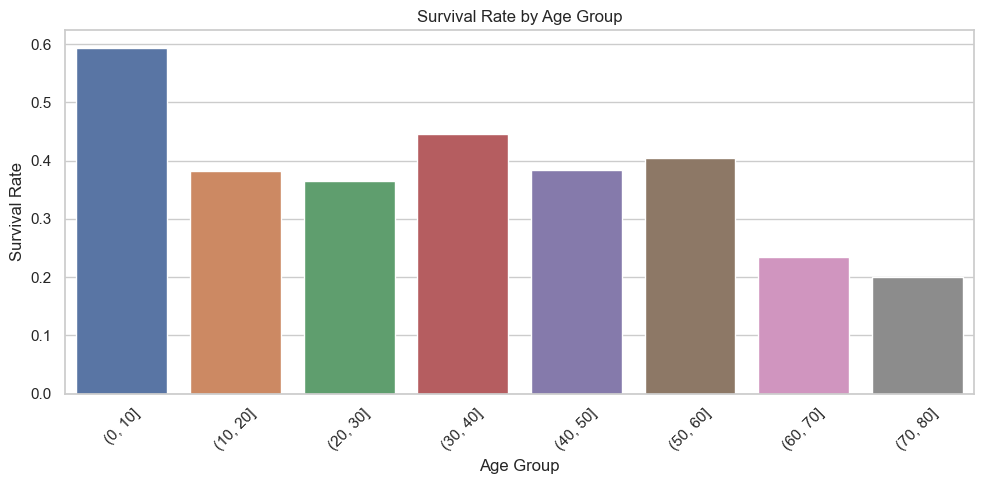

In [24]:
# Survival by Age

# Create age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
train_df['AgeBin'] = pd.cut(train_df['Age'], bins=age_bins)

# Set seaborn style
sns.set(style="whitegrid")

# Plot survival rate by age group
plt.figure(figsize=(10, 5))
sns.barplot(x='AgeBin', y='Survived', data=train_df, ci=None)
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

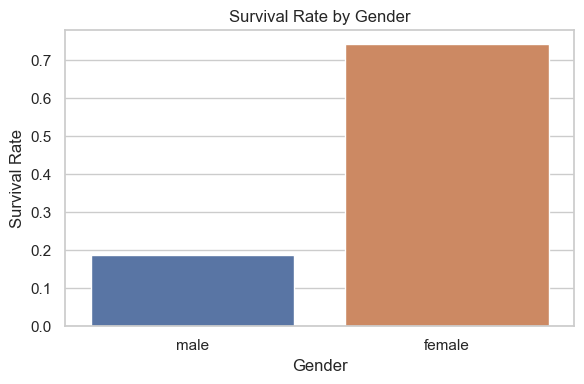

In [25]:
# Survival rate by gender

# Set seaborn style
sns.set(style="whitegrid")

# Plot survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=train_df, ci=None)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()

In [26]:
# Handle missing data

# Fill 'Age' with median or mean
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill 'Embarked' with the most frequent value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# You can either drop 'Cabin' or extract its first letter (deck info) - Cabin variable has too many missing values so we drop it 
if 'Cabin' in train_df.columns:
    train_df.drop('Cabin', axis=1, inplace=True)

#train_df.drop('Cabin', axis=1, inplace=True, errors='ignore')

print(train_df.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone',
       'AgeBin'],
      dtype='object')


In [27]:
# Logistic regression model 

# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Load data
df = pd.read_csv("train.csv")

# 3. Data preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)

# Encode categorical variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Feature engineering
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# Drop irrelevant columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# 4. Split data
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 6. Predict and evaluate
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8044692737430168
Confusion Matrix:
 [[90 15]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



In [28]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Grid Search
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_rf.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_rf.best_params_)
print("Best Accuracy (CV):", grid_rf.best_score_)

# Final model
best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Best Parameters: {'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy (CV): 0.8370432384516893
Test Accuracy: 0.8044692737430168


In [29]:
# XGBoost Classifier

!pip install xgboost






In [30]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Accuracy: 0.7988826815642458


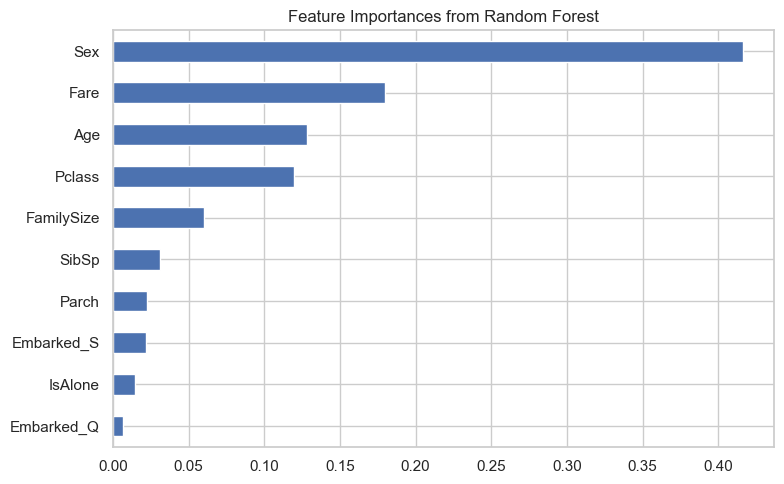

In [31]:
# Random Forest Plot 

# Feature importance from the best model
importances = pd.Series(best_rf.feature_importances_, index=X.columns)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind='barh')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


<Figure size 400x300 with 0 Axes>

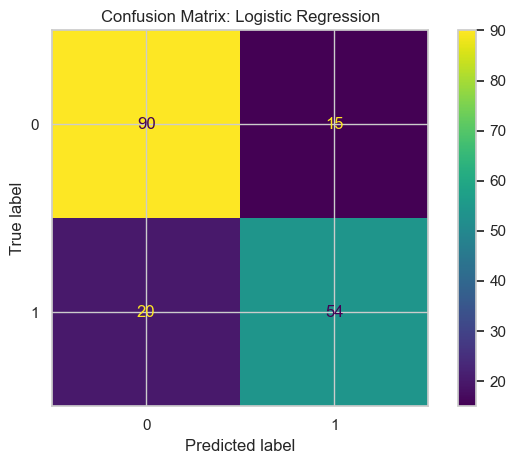

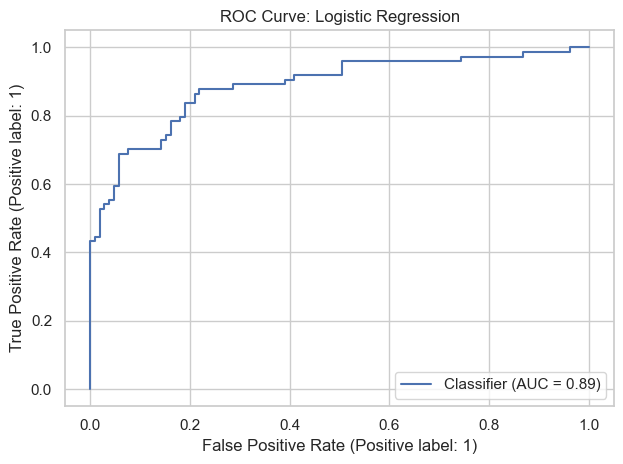

<Figure size 400x300 with 0 Axes>

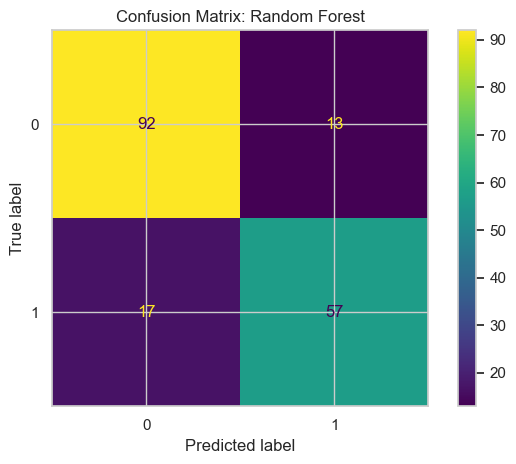

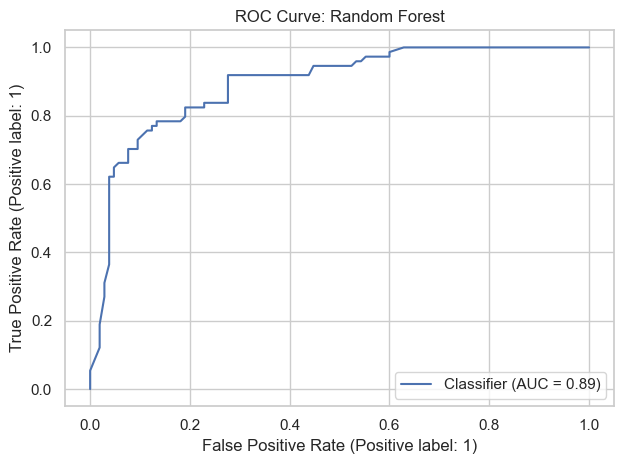

<Figure size 400x300 with 0 Axes>

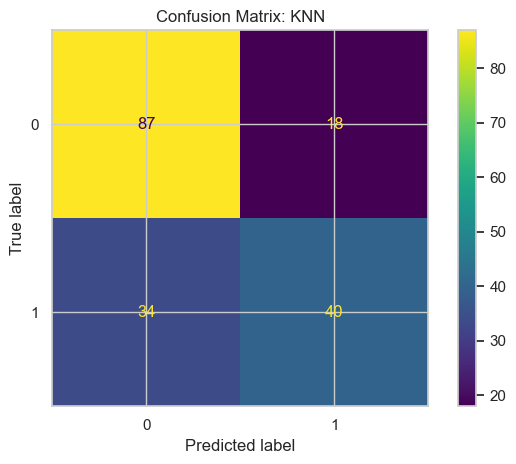

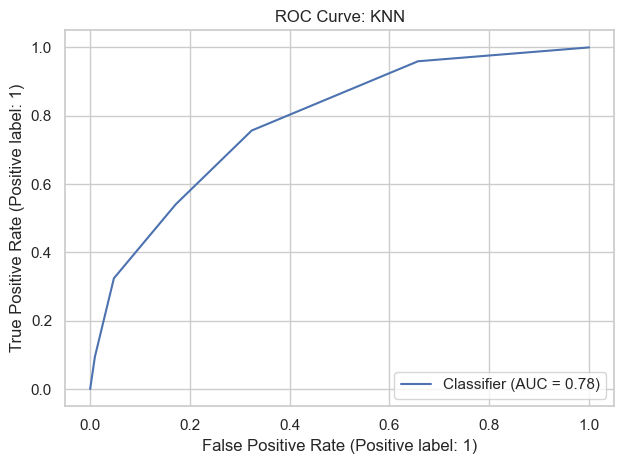

<Figure size 400x300 with 0 Axes>

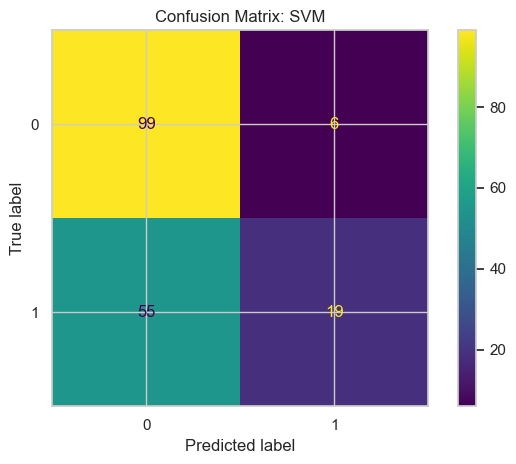

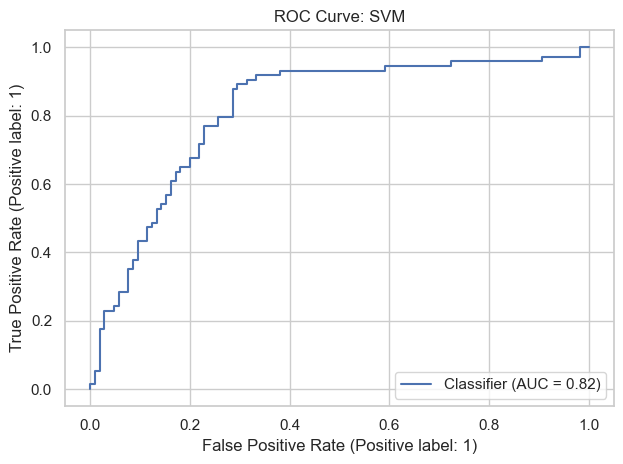

<Figure size 400x300 with 0 Axes>

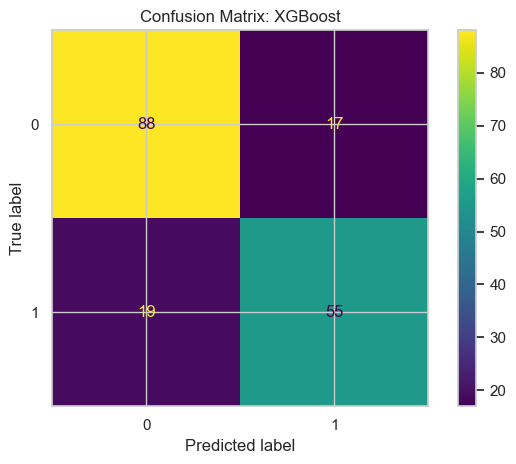

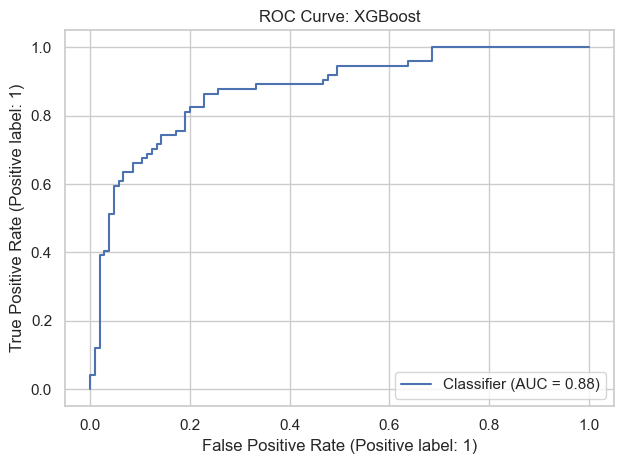

Model Comparison:

                     Accuracy   ROC AUC
Logistic Regression  0.804469  0.887902
Random Forest        0.832402  0.893372
KNN                  0.709497  0.782754
SVM                  0.659218  0.817632
XGBoost              0.798883  0.875418


In [32]:
# Titanic model comparison 

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import warnings
warnings.filterwarnings("ignore")

# Load data
df = pd.read_csv("train.csv")

# Preprocessing
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# Features and target
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Store results
results = {}

# Evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else None

    results[name] = {"Accuracy": acc, "ROC AUC": auc}

    # Confusion matrix
    plt.figure(figsize=(4, 3))
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)
    plt.title(f'Confusion Matrix: {name}')
    plt.tight_layout()
    plt.show()

    # ROC curve
    if y_proba is not None:
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f'ROC Curve: {name}')
        plt.tight_layout()
        plt.show()

# Final summary
results_df = pd.DataFrame(results).T
print("Model Comparison:\n")
print(results_df)


## Model Evaluation, Visual Analysis & Selection

To predict which passengers survived the Titanic shipwreck, we explored and evaluated multiple classification models using visual tools and performance metrics. Below is a breakdown of our key findings.

---

### Target Variable Distribution – *Survival Count*

We first visualized the count of survivors (1) vs non-survivors (0).  
**More passengers did not survive**, which gives us an initial understanding of the dataset.  
This slight imbalance means we can still use **accuracy**, but we should also monitor other metrics like **recall** and **AUC**.

---

### Survival Rate by Family Size

Passengers traveling in **small families (2–4 members)** had **higher survival rates**.  
 Larger families and solo travelers had lower chances.  
 This could reflect group support, easier access to lifeboats, or priority during evacuation.

---

### Survival Rate: Alone vs With Family

Passengers **traveling alone** (IsAlone = 1) had significantly **lower survival rates** compared to those with family.  
This reinforces the idea that being accompanied increased survival chances.

---

### Survival Rate by Age Group

We divided age into bins and found that:  
 **Children (0–10)** had the **highest survival rate**.  
 Survival generally declined with age, especially for those **60+**, likely due to physical limitations during evacuation.

---

### Survival Rate by Gender

This was the **most striking pattern**:
- **Females** had a **survival rate > 70%**
- **Males** had a **survival rate < 20%**

This aligns with the Titanic evacuation protocol: **“women and children first.”**

---

### Classification Metrics (Logistic Regression Example)

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0 (Not Survived) | 0.82 | 0.86 | 0.84 | 105 |
| 1 (Survived)     | 0.78 | 0.73 | 0.76 | 74  |

Accuracy: **0.80**  
This shows that Logistic Regression does well at capturing both classes, with a reasonable balance of precision and recall.

---

### Feature Importances (Random Forest)

Random Forest ranked features based on how useful they were in predicting survival. Top contributors:
1. **Sex** — strongest predictor
2. **Fare** — high-paying passengers (1st class) had higher survival
3. **Age** — children more likely to survive
4. **Pclass** — class played a major role in lifeboat access
5. **FamilySize** — moderate family size helped

---

#### Confusion Matrix Summary Across All Models

| Model               | True Negatives | False Positives | False Negatives | True Positives |
|---------------------|----------------|------------------|------------------|----------------|
| Logistic Regression | 90             | 15               | 20               | 54             |
| Random Forest       | 92             | 13               | 17               | 57             |
| KNN                 | 87             | 18               | 34               | 40             |
| SVM                 | 99             | 6                | 55               | 19             |
| XGBoost             | 88             | 17               | 19               | 55             |

---

### How were these numbers calculated?

All confusion matrices follow the standard layout:

[[ TN FP ] [ FN TP ]]


Each matrix is structured with:

- **TN (True Negatives)** = Top-left → Actual: 0, Predicted: 0  
- **FP (False Positives)** = Top-right → Actual: 0, Predicted: 1  
- **FN (False Negatives)** = Bottom-left → Actual: 1, Predicted: 0  
- **TP (True Positives)** = Bottom-right → Actual: 1, Predicted: 1  

So for example, the Logistic Regression matrix:

[[90 15] [20 54]]


Is interpreted as:

- True Negatives = 90
- False Positives = 15
- False Negatives = 20
- True Positives = 54

This format is used consistently to decode the matrices for all models.

---

🔍 **Interpretation**:
- **Random Forest** consistently makes the **fewest errors** (both false positives and false negatives).
- **SVM** has very high false negatives — it often misses actual survivors.
- **KNN** and **XGBoost** have moderate results but are slightly less reliable than Random Forest.

This supports Random Forest as the **best model** for accurately identifying both survivors and non-survivors.


**Random Forest** has the best overall balance — fewer mistakes on both classes.  
**SVM and KNN** struggle, especially with many **false negatives**, meaning they miss survivors.

---

### ROC Curves & AUC Scores

The ROC curve shows the **trade-off between true positive rate and false positive rate**. The **higher the AUC (Area Under Curve)**, the better the model.

| Model     | AUC |
|-----------|-----|
| Logistic Regression | 0.89 |
| Random Forest        | 0.89 |
| XGBoost              | 0.88 |
| SVM                  | 0.82 |
| KNN                  | 0.78 |

AUC > 0.85 is considered excellent.  
**Random Forest and Logistic Regression** lead again.

---

### Final Model Selection

| Model     | Accuracy | AUC   |
|-----------|----------|-------|
| **Random Forest** | **0.83** | **0.89** |
| Logistic Regression | 0.80 | 0.89 |
| XGBoost | 0.80 | 0.88 |
| KNN | 0.70 | 0.78 |
| SVM | 0.66 | 0.82 |

**Random Forest** was selected as the final model because it:
- Gave the **highest accuracy (83%)**
- Had one of the **highest AUC scores (0.89)**
- Balanced both false positives and false negatives effectively
- Offers **feature importance**, helping interpret predictions

---

** Final Statement:**

“After thorough analysis and evaluation, the Random Forest model was chosen as the most effective for predicting Titanic passenger survival. It not only achieved the highest accuracy and AUC, but also aligned well with key insights from exploratory analysis — such as the importance of gender, age, class, and family structure in survival outcomes.”


In [33]:
# 1. Import required libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# 2. Load training data
train_df = pd.read_csv("train.csv")

# 3. Preprocess training data
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1
train_df['IsAlone'] = (train_df['FamilySize'] == 1).astype(int)
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
train_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')

# 4. Prepare features and target
X = train_df.drop('Survived', axis=1)
y = train_df['Survived']

# 5. Train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 6. Load and preprocess test data
test_df = pd.read_csv("test.csv")
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1
test_df['IsAlone'] = (test_df['FamilySize'] == 1).astype(int)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)
passenger_ids = test_df['PassengerId']
test_df.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True, errors='ignore')

# 7. Match columns with training data
for col in X.columns:
    if col not in test_df.columns:
        test_df[col] = 0
test_df = test_df[X.columns]

# 8. Make predictions
predictions = model.predict(test_df)

# 9. Create submission file
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})
submission.to_csv("submission.csv", index=False)

print("submission.csv created and saved successfully.")


submission.csv created and saved successfully.
